In [214]:
#utils
import pandas as pd
import numpy as np 


#stat and machine learning
from scipy.stats import kstest, norm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from transformers import pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures



#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# First Look


The purpose of this study is to examine the primary factors that impact the salary of data science professionals and to provide an overview of the current state of the technology job market in the United States. To accomplish this objective, a comprehensive analysis of the dataset will be conducted, with a focus on the most significant features and their interrelationships.

In [100]:
data = pd.read_csv("data_cleaned_2021.csv",  escapechar='\n')
data = data.drop("index",axis=1)
data = data.drop(["Lower Salary", "Upper Salary", "Avg Salary(K)"], axis=1)
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data ScientistLocation: Albuquerque, NMEducati...",3.8,Tecolote Research3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\nI. General Summary\nThe Hea...,3.4,University of Maryland Medical System3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe44.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**Job ID: 310709\nDire...,3.8,PNNL3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


The presence of numerous intricate string inputs necessitates a thorough comprehension of the information at hand. However, before delving into the complexities of these inputs, it may be prudent to step back and visualize some of the metrics associated with the numeric features.

In [101]:
data.describe()

,Rating,Founded,Hourly,Employer provided,Age,Python,spark,aws,excel,sql,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,47.524259,0.528302,0.225067,0.237197,0.522911,0.512129,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.801210,497.183763,0.177034,0.149721,53.839080,0.499535,0.417908,0.425651,0.499812,0.500190,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
#Getting some insight of the how many misisng values in the dataset and the types of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  company_

# Data Cleaning

The presence of numerous intricate string inputs necessitates a thorough comprehension of the information at hand. However, before delving into the complexities of these inputs, it may be prudent to step back and visualize some of the metrics associated with the numeric features.

In [103]:
def clean_salaries(data):
  
  #here I'm taking the two numbers from the salry column and combining them in a easier format
  data['num1'] = data['Salary Estimate'].str.extract('(\d+)').astype(int)
  data['num2'] = data['Salary Estimate'].str.extract('\d+\D+(\d+)').astype(int)
  data['range'] = data.apply(lambda x: f"{x['num1']}-{x['num2']}", axis=1)

  #dropping the newly created features
  data = data.drop(["num1", "num2"], axis=1)

  return data

def min_salaries(row):
    range = [int(num) for num in row["range"].split("-")]
    return min(range)

def median_salaries(row):
    range = [int(num) for num in row["range"].split("-")]
    return pd.Series(range).median()

def max_salary(row):
    range = [int(num) for num in row["range"].split("-")]
    return max(range)

data = clean_salaries(data)
data["min salary"] = data.apply(lambda row: min_salaries(row), axis=1)
data["median salary"] = data.apply(lambda row: median_salaries(row), axis=1)
data["max salary"] = data.apply(lambda row: max_salary(row), axis=1)

data.tail()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,range,min salary,median salary,max salary
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - CambridgePost...,3.9,GSK3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,...,0,0,0,other scientist,sr,M,58-111,58,84.5,111
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGEEventbrite has a world-class data...,4.4,Eventbrite4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,...,0,0,0,data engineer,sr,na,72-133,72,102.5,133
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,...,0,0,0,other scientist,na,P,56-91,56,73.5,91
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\nOversee...,3.2,"Numeric, LLC3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,...,0,0,0,data scientist,na,na,95-160,95,127.5,160
741,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute3.6,"Beavercreek, OH","Arlington, VA",501 - 1000,1967,Nonprofit Organization,...,0,0,0,other scientist,na,M,61-126,61,93.5,126


Considering the range of salaries provided, one potential approach is to compute the median, mean, or maximum values. In the upcoming visualizations, the distribution of each method will be examined in order to determine the most appropriate approach. Specifically, the most appropriate approach should approximate a normal distribution while still preserving the salient information contained within the salary range, thereby minimizing information loss.

<AxesSubplot:xlabel='min salary', ylabel='Count'>

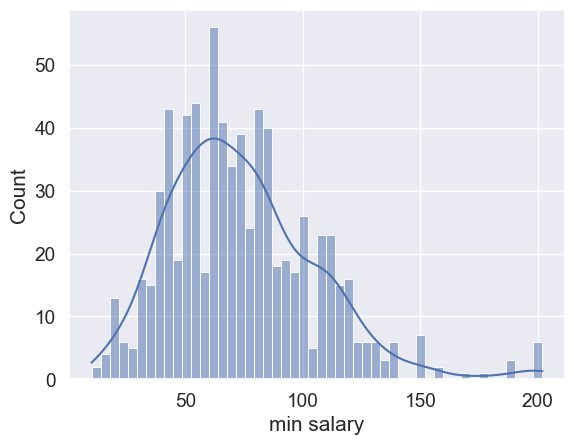

In [104]:
#let's plot the mean salaries distribution first 
sns.histplot(data["min salary"], bins=50, kde=True)

<AxesSubplot:xlabel='median salary', ylabel='Count'>

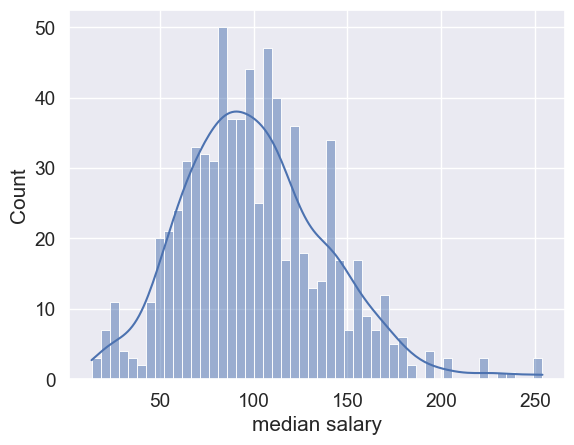

In [105]:
#this is instead the median salary
sns.histplot(data["median salary"], bins=50, kde=True)

<AxesSubplot:xlabel='max salary', ylabel='Count'>

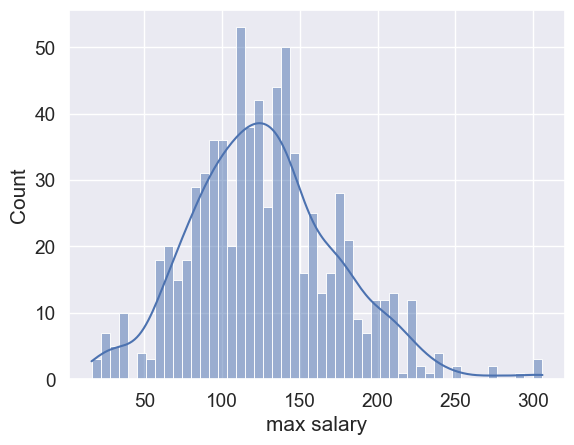

In [106]:
#max salary
sns.histplot(data["max salary"], bins=50, kde=True)

The present study aims to evaluate the degree of normality exhibited by each of the three distributions - median, mean, and maximum - through the utilization of the Kolmogorov-Smirnov test. However, prior to conducting this analysis, it is necessary to standardize the features in order to enable a comparison with the normal distribution, which is assumed to be on the same scale.

In [107]:
#takes a column from a dataframe and 
#returns it standardized

def standardize_col(column):
  
  return (data[column] - data[column].mean()) / data[column].std()



In [108]:
ks1, p1 = kstest(standardize_col("median salary"), norm.cdf)
ks2, p2 = kstest(standardize_col("min salary"), norm.cdf)
ks3, p3 = kstest(standardize_col("max salary"), norm.cdf)


print("KS statistic and p-value for the median salary:", ks1, p1)
print("KS statistic and p-value for the min salary:", ks2, p2)
print("KS statistic and p-value for the max salary:", ks3, p3)

KS statistic and p-value for the median salary: 0.052482742828886764 0.032363119235189086
KS statistic and p-value for the min salary: 0.0729259351812791 0.0007068270170100536
KS statistic and p-value for the max salary: 0.05405599853419818 0.025203763648939947


1. The KS-statistic is a metric that ranges from 0 to 1, where a value of 0 denotes a perfect match with the normal distribution, while a value of 1 signifies the greatest possible distance from it. Based on the current findings, the most promising candidates are the median and maximum salary distributions.

2. The p-value indicates the likelihood of observing values that are as extreme as those that have been recorded. If the p-value falls below 0.05, we can reject the hypothesis that our empirical distribution is derived from the reference distribution (normal), whereas a p-value above 0.05 indicates that we cannot conclusively state whether the distribution is derived from the reference distribution or not. With this in mind, all three of the examined features possess a p-value that is less than 0.05, thereby suggesting that none of them conform to a normal distribution.
 

In [109]:
def relative_diff(a, b):
    return abs(a - b) / ((a + b) / 2)

# apply the function to each pair of values in the two columns
diff = data.apply(lambda x: relative_diff(x['max salary'], x['min salary']), axis=1)

# calculate the mean of the relative differences
print(diff.mean())

0.5403164031175348


The next step of the analysis involves examining the relative difference between the maximum and minimum values. This comparison serves to determine whether utilizing the median salary as a target variable would be more appropriate than either of the other two potential options. Specifically, if the average relative difference between the maximum and minimum values in each row is sufficiently large, then the median salary should be employed as the target variable. Given a relative difference of 54%, it appears that the median salary distribution is the most appropriate choice, relative to the other two distributions.

In [110]:
data = data.drop(["max salary", "min salary", "range", "Salary Estimate"], axis=1)
data.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,median salary
0,Data Scientist,"Data ScientistLocation: Albuquerque, NMEducati...",3.8,Tecolote Research3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,0,1,1,0,0,0,data scientist,na,M,72.0
1,Healthcare Data Scientist,What You Will Do:\nI. General Summary\nThe Hea...,3.4,University of Maryland Medical System3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,...,0,0,0,0,0,0,data scientist,na,M,87.5
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe44.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,...,0,0,0,0,0,0,data scientist,na,M,85.0
3,Data Scientist,*Organization and Job ID**Job ID: 310709\nDire...,3.8,PNNL3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,...,0,0,0,0,0,0,data scientist,na,na,76.5
4,Data Scientist,Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,...,0,0,0,0,0,0,data scientist,na,na,114.5


In [111]:
classifier = pipeline('sentiment-analysis', model='bert-base-uncased', tokenizer='bert-base-uncased')

#Using a sentiment analysis model
#we want to generate a score for each job description
#it's difficult that it will really capture 
#how the description correlates with the salary
#but at least we're not completely losing the information 
#found in the description
scores = []
for desc in data['Job Description']:
    result = classifier(desc, truncation=True)
    score = result[0]['score']
    scores.append(score)

# Add the scores to the DataFrame
data['description_score'] = scores
data = data.drop("Job Description", axis=1)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# EDA: Some more visualizations and insights 

The subsequent step of the analysis entails examining the second most significant feature, which is denoted by the "Job Title" field. The initial objective is to conduct a count of the unique entries or identified roles. Converting the string values to numeric equivalents is not expected to pose significant difficulties, but before proceeding with this step, it may be prudent to ascertain the frequency of each entry. Given the large number of distinct entries, the focus will be on identifying the most frequently recurring entries, where the value of n is predetermined.

In [112]:
data['Job Title'].nunique()

264

In [113]:
def visualize_freq_job():
  freq = data['Job Title'].value_counts().sort_values(ascending=False)

  # select the top 5 categories with the highest frequency
  top_n = 15
  top_categories = freq[:top_n]

  print("This is the total number of elements with one of the n-most recurring labels " + str(top_categories.sum()))
  print("This is the percentage of elements with one of the n-most recurring labels " + str(top_categories.sum() / len(data)))

  plt.barh(top_categories.index, top_categories.values)
  plt.title(f'Top {top_n} Categories by Frequency')
  plt.xlabel('Category')
  plt.ylabel('Count')
  plt.show()

This is the total number of elements with one of the n-most recurring labels 305
This is the percentage of elements with one of the n-most recurring labels 0.4110512129380054


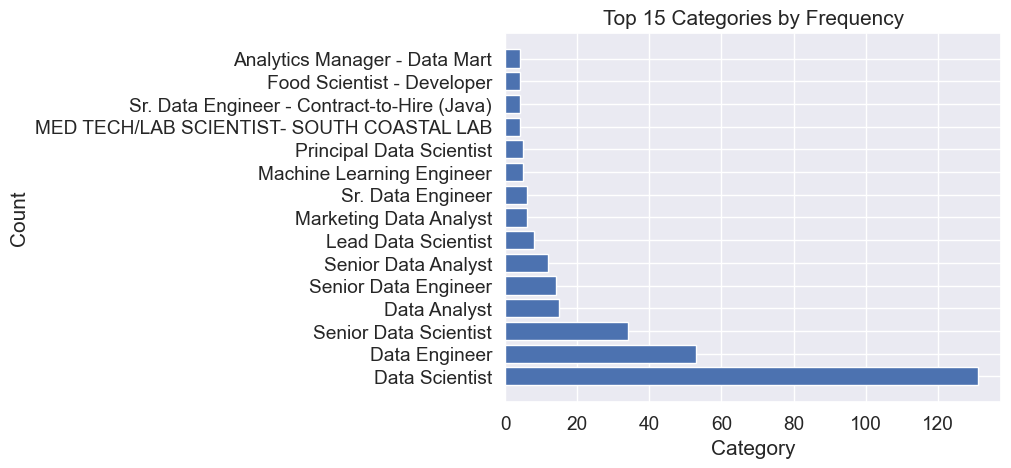

In [114]:
visualize_freq_job()

It is reasonable to assume that the identified entries are representative of the total distribution, as they account for up to 41% of the overall data. However, it appears that numerous labels are either repetitive or overly specific, rendering them of limited utility. Consequently, data cleaning procedures will be employed to enhance the clarity and uniformity of the "Job Title" field. This will involve collapsing distinct but similar titles, such as "Data Scientist Senior" and "Sr. Data Scientist," into a single category denoted as "DS Senior."

In [115]:
def cleanFeature(column, values, new_name):

  data[column] = data[column].str.replace('|'.join(values), new_name, case=False)
  return data

C:\Users\carlo\AppData\Local\Temp\ipykernel_13640\168017779.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



This is the total number of elements with one of the n-most recurring labels 313
This is the percentage of elements with one of the n-most recurring labels 0.42183288409703507


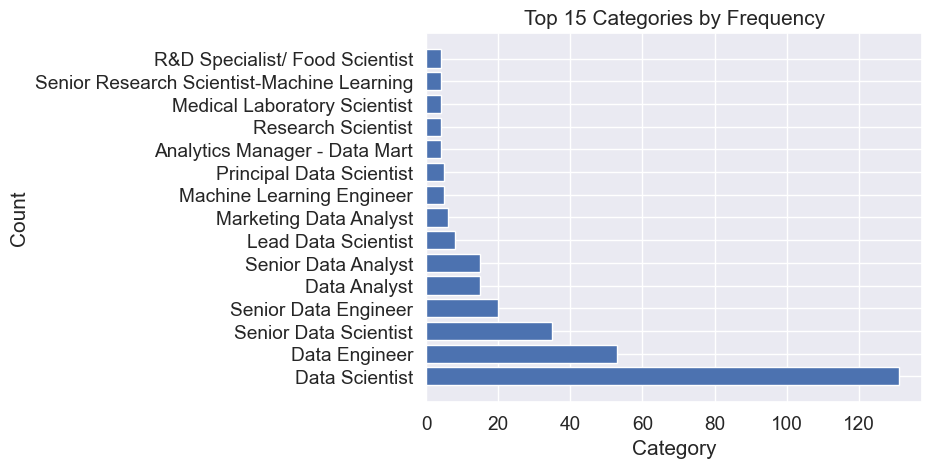

In [116]:
to_be_changed = ['Sr. Data Scientist', 'Senior Data Scientist']
data = cleanFeature("Job Title", to_be_changed, 'Senior Data Scientist')
to_be_changed = ['Senior Data Engineer', 'Sr. Data Engineer']
data = cleanFeature('Job Title' , to_be_changed, 'Senior Data Engineer')
to_be_changed = ['Senior Data Analyst', 'Sr. Data Analyst']
data = cleanFeature('Job Title' , to_be_changed, 'Senior Data Analyst')
visualize_freq_job()

Regrettably, due to the sheer volume of distinct values present in the dataset, it is not feasible to perform a comprehensive cleaning of all redundant information. Nevertheless, it may be beneficial to shift the focus towards more enjoyable tasks, such as the visualization of salary distribution across the United States using a geographical map. To enable this analysis, the "Location" feature will be split into separate "State" and "City" fields, thereby facilitating a more granular examination of the top paying cities. However, it is unlikely that this analysis will yield any particularly surprising results.

In [117]:
import plotly.express as px

data[['city', 'state']] = data['Location'].str.split(', ', expand=True, n= 1).fillna('Unknown')
data = data.drop("Location", axis=1)

#here I'm creating a dataframe that is gonna be funcitonal for the visualization
state_salary = data.groupby('state')['median salary'].median().reset_index()
state_salary.columns = ['state', 'state salary']
unique_states = state_salary.drop_duplicates(subset=['state']).reset_index(drop=True)

fig = px.choropleth(unique_states, locations='state', locationmode='USA-states', color='state salary',
                    scope='usa', color_continuous_scale='Plasma',
                    range_color=(unique_states['state salary'].min(), unique_states['state salary'].max()))
fig.update_layout(title='Data Scientists Salaries in the USA', title_x=0.5)
fig.show()

In [118]:
#creating a dataframe containing the median salaries for all the 
#cities with at least 10 entries in the dataframe

city_counts = data['city'].value_counts()
selected_cities = city_counts[city_counts >= 10].index.tolist()
city_salary = data[data['city'].isin(selected_cities)].groupby('city')['median salary'].median().reset_index()
city_salary.columns = ['city', 'city salary']
cities = city_salary.drop_duplicates(subset=['city']).reset_index(drop=True)

top_cities = cities.nlargest(10, 'city salary')
fig = px.bar(top_cities, x='city', y='city salary', color='city salary', 
             color_continuous_scale='RdBu', title='Top 10 Cities with Highest Average Salary')

# Set the x-axis label
fig.update_xaxes(title_text='City')

# Set the y-axis label
fig.update_yaxes(title_text='Average Salary')

# Show the plot
fig.show()

Upon careful examination of the dataset and accounting for a minimum threshold of 10 entries, a discernible pattern emerges that aligns with real-world trends. Specifically, it is evident that cities with more robust technology industries tend to offer higher salaries, with San Jose representing a prime example.

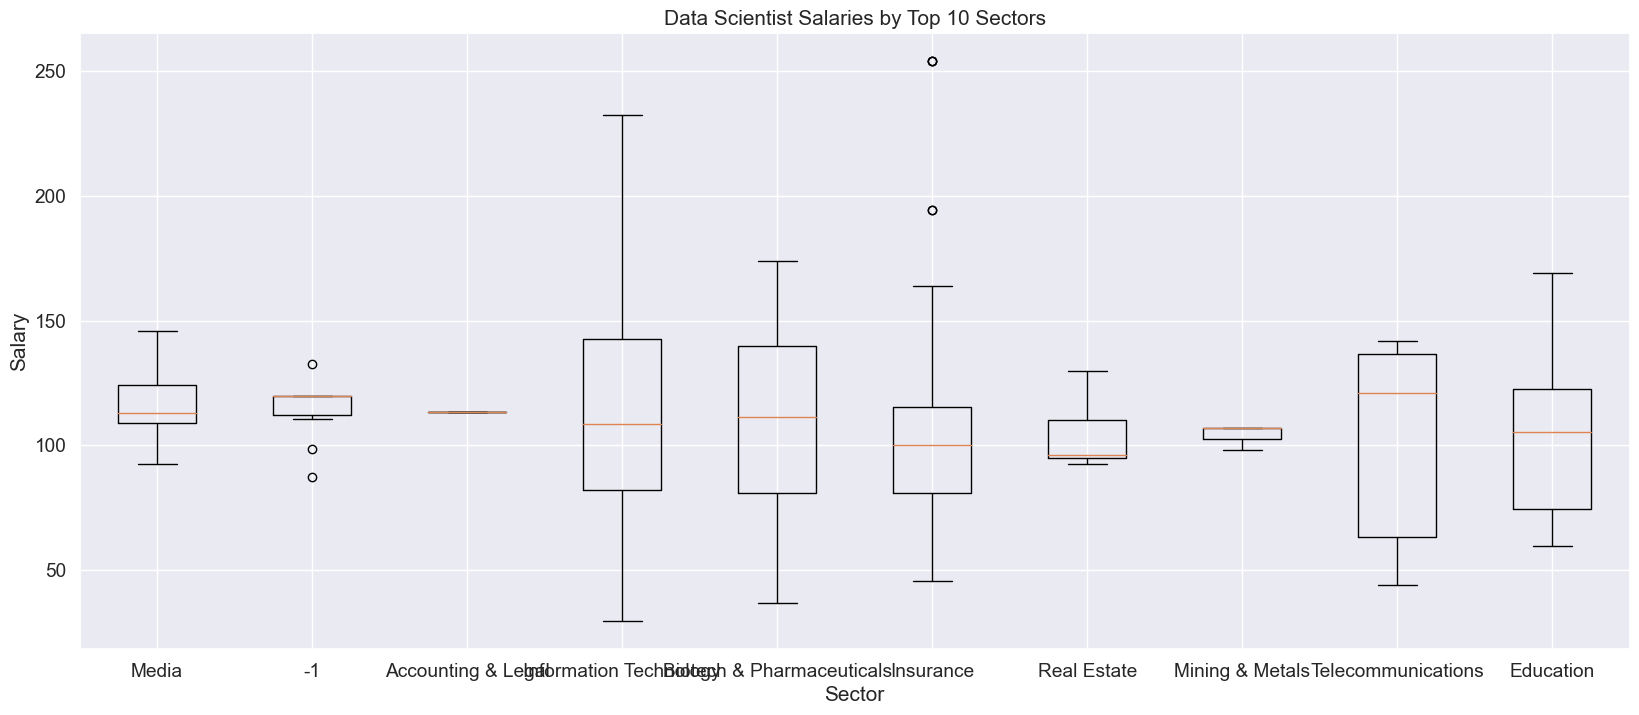

In [119]:
top10_sectors = data.groupby('Sector')['median salary'].mean().nlargest(10).index.tolist()
top10_sectors.sort(key=lambda x: data[data['Sector']==x]['median salary'].mean(), reverse=True)

# Filter the original dataframe to include only the top 10 sectors
top10 = data[data['Sector'].isin(top10_sectors)]

# Create a box plot of salaries by sector for the top 10 sectors
plt.figure(figsize=(20, 8))
plt.boxplot([top10[top10['Sector'] == s]['median salary'] for s in top10_sectors], labels=top10_sectors)
plt.xlabel('Sector')
plt.ylabel('Salary')
plt.title('Data Scientist Salaries by Top 10 Sectors')
plt.show()

The analysis of the dataset indicates that the sectors in which data scientists are compensated most highly are not necessarily the most intuitively obvious ones, such as real estate or education. Rather, these professionals tend to be more widely employed in the IT, biotech, and insurance industries, as evidenced by the distribution of "whiskers" within these fields. This observation is consistent with the inference that a greater variance in salary distribution corresponds to a broader range of professional backgrounds, years of experience, and business responsibilities among data science professionals in these industries.

In [120]:
data_scientists = data[data.job_title_sim.str.contains('data scientist')]

<BarContainer object of 10 artists>

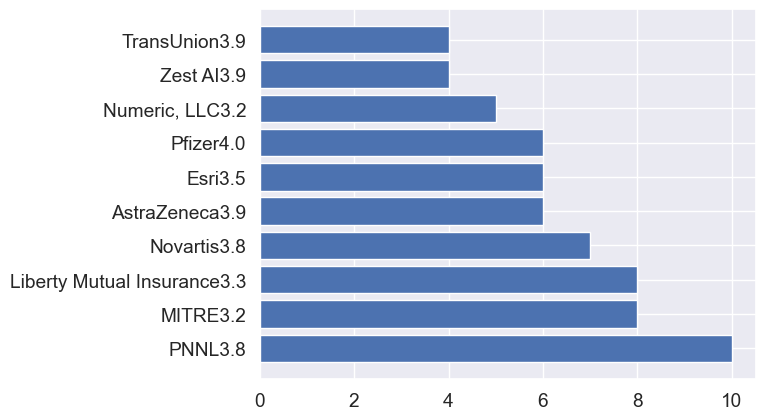

In [121]:
plt.barh(data_scientists['Company Name'].value_counts().index[:10] , data_scientists['Company Name'].value_counts().values[:10])

The aforementioned plot provides insight into the companies that employ the largest numbers of data scientists. As expected, the healthcare sector exhibits a high demand for these professionals, as evidenced by the relative frequency of data science positions in this field.

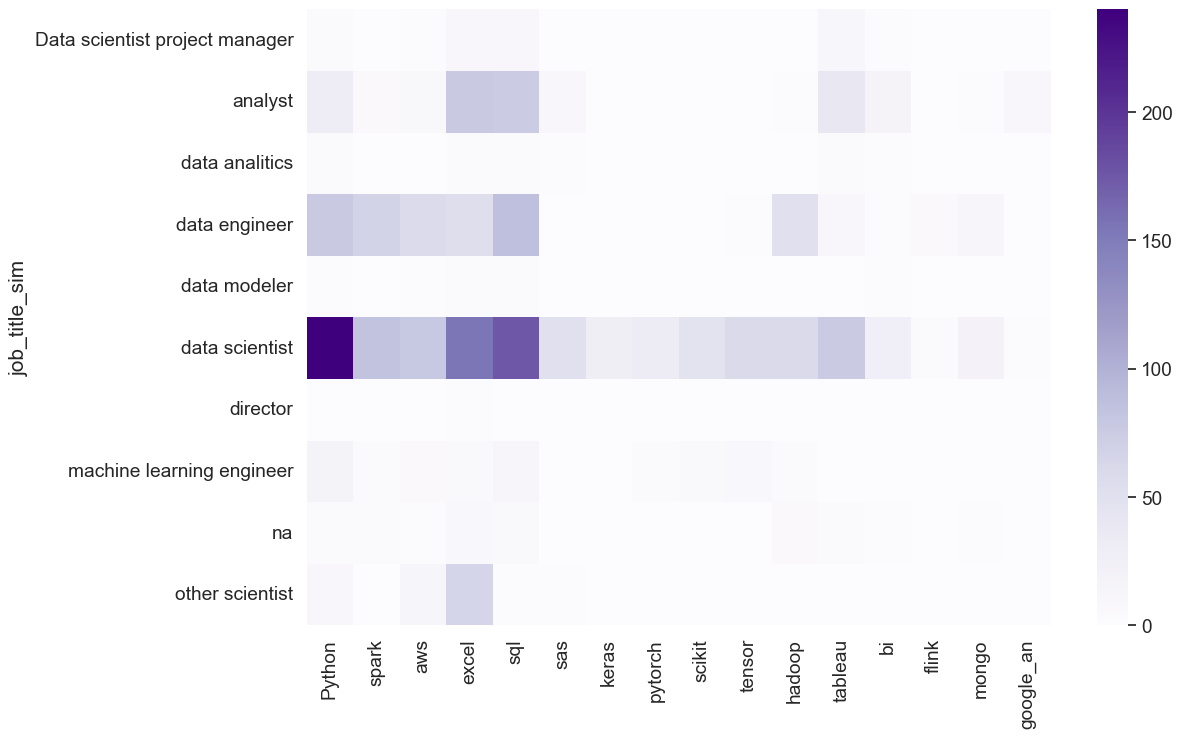

In [122]:
skill_labels = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
                'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
skills_by_title = data.groupby('job_title_sim')[skill_labels].sum()
plt.figure(figsize=(12, 8))
sns.heatmap(skills_by_title, cmap='Purples')
plt.show()

The chart presented above illustrates the most sought-after skills across various job titles. The gradient of colors reflects the relative importance of each skill, with darker hues indicating greater significance in relation to the corresponding job.

# Patterns start to emerge...

To construct a robust model, it is imperative to clearly identify the most significant independent variables in relation to the target variable, namely "median salary." One potential approach to this task is to generate a correlation matrix that encompasses all the available features and subsequently narrow the scope of the analysis accordingly.

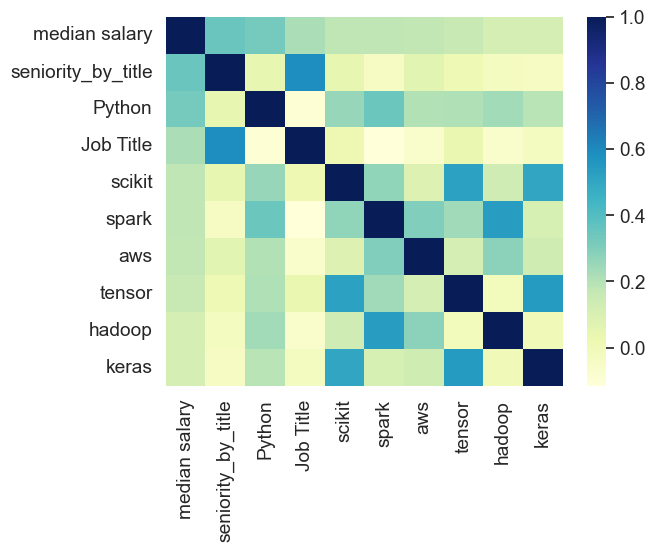

In [123]:
copy = data.copy()

le = LabelEncoder()

# apply the LabelEncoder to all categorical columns
for col in copy.select_dtypes(include='object').columns:
    copy[col] = le.fit_transform(copy[col])

corr = copy.corr()
top_features = corr.nlargest(10, 'median salary')['median salary'].index
top_corr = copy[top_features].corr()

# plot the heatmap of the top 10 most correlated features
sns.set(font_scale=1.25)
sns.heatmap(top_corr, cmap='YlGnBu')
plt.show()

Anomalies have emerged during the correlation analysis, specifically the correlation between "median salary" and any other feature is exceptionally low. Only a marginal correlation has been identified between "seniority by title" and "Python." These findings underscore the highly heterogeneous nature of the data science profession, wherein there are no clear-cut, one-size-fits-all solutions, aside from, perhaps, proficiency in the Python programming language. Moreover, it should be noted that the dataset includes a diverse range of professional roles beyond data science, which may contribute to the observed lack of correlation. Further exploration is necessary to elucidate these findings.

In [124]:
data.head()

,Job Title,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,...,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,median salary,description_score,city,state
0,Data Scientist,3.8,Tecolote Research3.8,"Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),...,0,0,0,data scientist,na,M,72.0,0.502853,Albuquerque,NM
1,Healthcare Data Scientist,3.4,University of Maryland Medical System3.4,"Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),...,0,0,0,data scientist,na,M,87.5,0.557699,Linthicum,MD
2,Data Scientist,4.8,KnowBe44.8,"Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),...,0,0,0,data scientist,na,M,85.0,0.654167,Clearwater,FL
3,Data Scientist,3.8,PNNL3.8,"Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),...,0,0,0,data scientist,na,na,76.5,0.531460,Richland,WA
4,Data Scientist,2.9,Affinity Solutions2.9,"New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,...,0,0,0,data scientist,na,na,114.5,0.535902,New York,NY


Next, we will proceed with the final steps to prepare the data for regression modeling. Firstly, we need to transform categorical variables into numerical ones. Then, we will apply standardization to ensure that all variables are on a similar scale.

In [228]:
# Get the list of continuous variable column names
continuous_vars = [col for col in data.columns if col != 'median salary' and data[col].dtype != 'object' and data[col].nunique() > 2]


# Scale the continuous variables only
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[continuous_vars])
data[continuous_vars] = data_scaled

# Convert categorical variables to numerical values
data_encoded = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns)

# Split the data into X and y
X = data_encoded.drop('median salary', axis=1)
y = data_encoded['median salary']


X.head()

,Rating,Founded,Hourly,Employer provided,Age,Python,spark,aws,excel,sql,...,state_OR,state_PA,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI
0,0.225242,0.275732,0,0,0.006333,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.296521,0.297736,0,0,-0.197635,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.529650,0.349746,0,0,-0.679740,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.225242,0.259729,0,0,0.154673,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.948725,0.325741,0,0,-0.457230,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


Given that a majority of the features do not have significant predictive power, we can employ dimensionality reduction using Principal Component Analysis (PCA). This method will provide us with a condensed representation of the data. In order to proceed, we will first need to determine the appropriate number of components. This can be achieved by plotting the cumulative explained variance, which shows the amount of variance explained by the components as a function of the number of components.

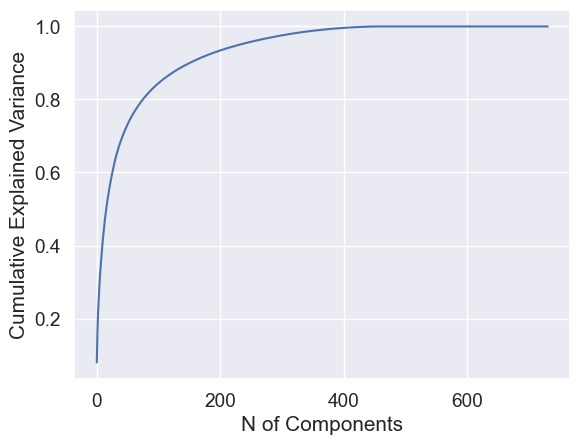

In [229]:
#set up the PCA
pca = PCA()
X_pca = pca.fit_transform(X)

#find the cumulative variance
ex_var = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(ex_var)


plt.plot(cumulative_variance)
plt.xlabel('N of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

The analysis indicates that the majority of the features do not adequately explain the variance observed in the data. Thus, it is deemed appropriate to consider a subset of the features. For instance, the first 200 features can be selected for the purpose of the analysis.

In [230]:
sorted_features = np.argsort(-cumulative_variance)

# Select the top 100 features
top_200_features = sorted_features[:200]

# Create a new dataframe with the top 200 features
df_top_200_features = pd.DataFrame(X_pca[:, top_200_features])

df_top_200_features.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,9.151146e-19,-4.231088e-28,-5.848958e-28,8.221221e-28,-1.061586e-27,1.448876e-27,2.179987e-27,2.845782e-27,3.674631e-27,-5.218638e-27,...,-8.108521e-47,-3.392580e-47,-1.318020e-47,-5.331237e-48,1.781317e-48,-9.498476e-36,7.026257e-49,-9.485638e-50,-3.660982e-50,-1.985864e-34
1,9.151146e-19,-4.231777e-28,-5.846783e-28,8.223158e-28,-1.061462e-27,1.448833e-27,2.180033e-27,2.846037e-27,3.674490e-27,-5.218672e-27,...,-1.038920e-31,-1.685994e-32,-6.539109e-33,7.734746e-33,7.425668e-33,6.852934e-32,-2.637280e-32,4.160055e-32,3.176481e-33,1.826618e-31
2,1.263095e-17,-1.203924e-18,6.572893e-18,1.053556e-17,8.181022e-19,7.487792e-18,-1.025655e-17,-7.425095e-19,8.706841e-18,1.223174e-17,...,6.040514e-32,-1.095563e-32,1.303637e-32,-1.233501e-32,4.350573e-32,6.458261e-32,7.558965e-33,-5.119834e-33,-3.382249e-32,-9.024621e-21
3,-2.282394e-17,1.500089e-18,6.242969e-18,1.049513e-17,5.442511e-18,1.380205e-17,-1.244726e-17,2.299315e-18,1.147413e-17,1.393279e-17,...,4.288040e-32,-8.976968e-33,-2.159963e-32,3.272785e-33,2.261773e-32,-1.833723e-32,5.444464e-32,-2.673297e-33,-4.103706e-32,5.668474e-19
4,9.151146e-19,-4.232204e-28,-5.845781e-28,8.222340e-28,-1.061746e-27,1.448742e-27,2.179751e-27,2.845868e-27,3.674451e-27,-5.218617e-27,...,-3.145090e-32,-1.563246e-32,-2.807580e-34,-6.560170e-32,-8.895594e-33,3.447802e-32,-9.007487e-33,6.951554e-33,1.447860e-32,8.483699e-33


Let us now examine the performance of the regression models that we have analyzed. We will compare these models using the evaluation metrics, namely "R2", "Accuracy", "Precision", and "Recall".

In [231]:
def metrics_model(model, X, y):

    #compute the scores on each metric    
    cv = KFold(n_splits=5,shuffle=True,random_state=45)

    r2_val_score = cross_val_score(model, X, y, cv=cv,scoring="r2")
    r2 = r2_val_score.mean()

    mse_scores = -1 * cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    mse = mse_scores.mean()

    rmse_scores = -1 * cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    rmse = rmse_scores.mean()

    mae_scores = -1 * cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    mae = mae_scores.mean()

    
    metrics_dict = {
        'R2 Score': round(r2, 4),
        'Mean squared error': round(mse, 4),
        'Root mean squared error': round(rmse, 4),
        'Mean absolute error': round(mae, 4),
    }

    return metrics_dict

def model_fitting(X, y):

    results_table={}

    #define a model and find it's performance
    model = linear_model.LinearRegression()
    results_table["Linear"]=metrics_model(model, X, y)

    model = linear_model.Lasso(alpha=1e-4)
    results_table["Lasso"]=metrics_model(model, X, y)
    
    model = linear_model.Ridge()
    results_table["Ridge"]=metrics_model(model, X, y)
    
    model = linear_model.BayesianRidge()
    results_table["Bayesian Ridge"]=metrics_model(model, X, y) 


    model = BaggingRegressor()
    results_table["Bagging"]=metrics_model(model, X, y)
    
    model = RandomForestRegressor()
    results_table["RandomForest"]=metrics_model(model, X, y)
    
    model = AdaBoostRegressor()
    results_table["AdaBoost"]=metrics_model(model, X, y)
    
    
    results_table = pd.DataFrame.from_dict(results_table,orient='index')
    results_table.columns=["R Squared ", "MSE", "RMSE", "MAE"] 
    return results_table

In [232]:
model_fitting(df_top_200_features, data['median salary'])

,R Squared,MSE,RMSE,MAE
Linear,-2.2343,4140.5775,64.2311,47.1648
Lasso,-0.0178,1316.9022,36.2407,28.9484
Ridge,-0.0138,1311.3244,36.1682,28.9552
Bayesian Ridge,-0.0161,1314.3693,36.2086,28.9601
Bagging,0.2310,1026.0196,32.2110,22.4643
RandomForest,0.2376,972.8369,31.2349,22.3404
AdaBoost,0.0044,1261.7620,35.6992,28.7302


In [233]:
model_fitting(X, data['median salary'])

d:\programs\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.736e+02, tolerance: 7.390e+01

d:\programs\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.455e+02, tolerance: 7.770e+01

d:\programs\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.879e+02, tolerance: 7.498e+01

d:\programs\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: Con

,R Squared,MSE,RMSE,MAE
Linear,-2.997942e+22,3.851671e+25,3.605923e+12,1.765450e+12
Lasso,7.250000e-01,3.582947e+02,1.872870e+01,9.291800e+00
Ridge,7.595000e-01,3.121678e+02,1.754840e+01,1.073310e+01
Bayesian Ridge,6.937000e-01,3.958786e+02,1.970930e+01,1.009910e+01
Bagging,7.206000e-01,3.670174e+02,1.857270e+01,1.243510e+01
RandomForest,7.362000e-01,3.437561e+02,1.846940e+01,1.155510e+01
AdaBoost,4.139000e-01,7.474180e+02,2.721240e+01,2.221220e+01


The aforementioned tables indicate a lack of evidence to support the feasibility of fitting a sufficiently accurate regression model with the given dataset. Among the models tested, the Ridge regression model trained on the complete data set appears to perform the best, as determined by the R-squared and RMSE metrics. To better evaluate the model's fit, we will examine the residuals plot, distribution of the residuals, and Q-Q plot.

In [234]:
# defining the model once more
model = linear_model.Ridge()

#getting the residuals using the same cross-validation method
cv = KFold(n_splits=5, shuffle=True, random_state=45)

# Fit the model and make predictions
y_pred = cross_val_predict(model, X, y, cv=cv)

# Calculate the residuals
residuals = y - y_pred

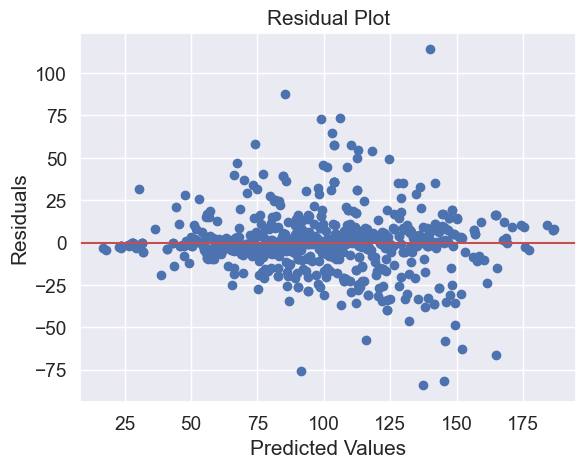

In [235]:
# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

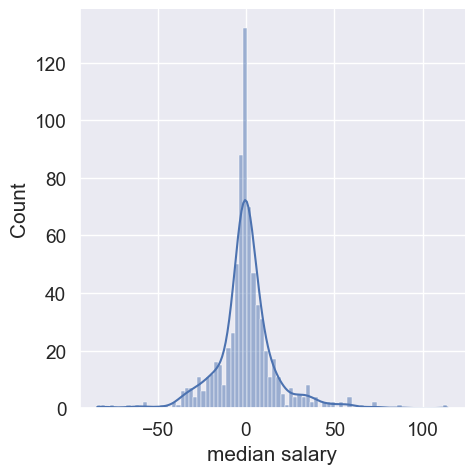

In [236]:
sns.displot(residuals, kde=True)

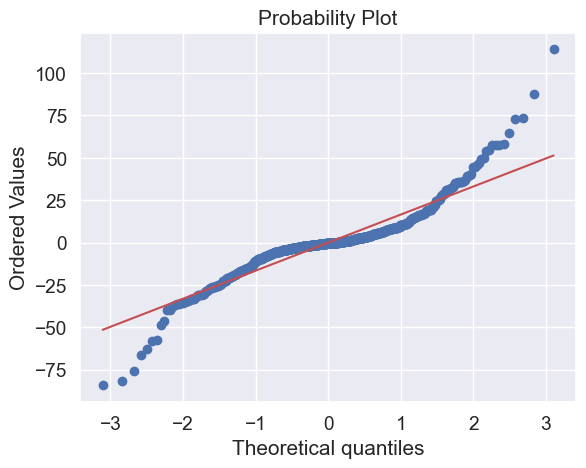

In [237]:
import scipy.stats as stats

stats.probplot(residuals, plot=plt)
plt.show()

Based on the presented plots, the model predictions do not deviate significantly from the actual values. The residuals plot indicates that the points are scattered randomly around the residual=0 line, while the distribution plot shows a symmetric yet leptokurtic shape that resembles a normal distribution. Additionally, the QQ-plot seems relatively accurate except for the most extreme values, indicating the presence of potential outliers. In this regard, there are only ten values that are significantly off, and we need to investigate whether they are outliers. The next step is to remove the ten most extreme outliers and evaluate whether this leads to a significant improvement in the model's performance.

In [238]:
q1 = data_encoded['median salary'].quantile(0.25)
q3 = data_encoded['median salary'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data_encoded[(data_encoded['median salary'] < lower_bound) | (data_encoded['median salary'] > upper_bound)].sort_values('median salary', ascending=False)

top_10_outliers = outliers.head(10)

print(top_10_outliers['median salary'])

708    254.0
410    194.5
616    194.5
507    194.0
681    194.0
Name: median salary, dtype: float64


In [239]:
data_encoded = data_encoded.drop(top_10_outliers.index)
X = data_encoded.drop('median salary', axis=1)
y = data_encoded['median salary']

After removing the most extreme outliers, our next step is to perform hyperparameter tuning. Specifically, we will search through a range of 1000 alphas, representing regularization values, starting from 0 and up to 100. The model with the best performance will be selected, and we will then visualize its metrics once again.

In [240]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alphas = np.linspace(0, 100, num=1000)
# Define the hyperparameter grid to search
param_grid = {'alpha': alphas}

# Define the model
model = Ridge()

# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the data
grid.fit(X, y)

# Print the best hyperparameters
print(grid.best_params_)

# Get the best model
best_model = grid.best_estimator_

d:\programs\conda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

d:\programs\conda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

d:\programs\conda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

d:\programs\conda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

d:\programs\conda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



{'alpha': 0.3003003003003003}


In [241]:
#now that we have a better alpha we can fine tune the model and see what are its performance metrics
results_table={}
model = linear_model.Ridge()
results_table["Fine Tuned Ridge"]=metrics_model(best_model, X, y)

results_table = pd.DataFrame.from_dict(results_table,orient='index')
results_table.columns=["R Squared ", "MSE", "RMSE", "MAE"] 

results_table

,R Squared,MSE,RMSE,MAE
Fine Tuned Ridge,0.7538,302.832,17.2657,9.8269


Based on the obtained results, it appears that further improvements in the model's performance are unlikely. Therefore, it is appropriate to draw some conclusions and make recommendations based on the analysis.

# Conlcusion & Recommendations

Based on the analysis of data scientists job ads in the USA in 2021, it can be concluded that the field of data science offers a wide range of opportunities in various industries and locations. As Tevfik, Carlo, and Xander are looking for data science job opportunities in the USA, it is important to keep in mind that the dataset used in this analysis is limited to job ads from a private website and may not represent the entire job market.

However, this analysis provides insights on the median salaries, the most in-demand skills, and the top job titles and companies in the field of data science. The analysis also reveals that the states with the highest median salaries for data scientists are San Jose, San Francisco, and Chicago, while the top sectors for data scientists in terms of median salaries are Information Technology, Biotech, and Insurance. Moreover, the analysis shows that Python, SQL, and AWS are the most in-demand skills for data scientists.

Based on these findings, Tevfik, Carlo, and Xander may want to consider focusing their job search on San Jose, San Francisco, and Chicago and exploring opportunities in Information Technology, Biotech, and Insurance sectors. Furthermore, they may want to invest time in developing their skills in Python, SQL, and AWS to increase their chances of getting hired and negotiating better salaries.

It is important to note that this analysis is based on a limited dataset and there may be other factors to consider when job searching, such as company culture, work-life balance, and job satisfaction. Nonetheless, this analysis provides a useful starting point for Tevfik, Carlo, and Xander to evaluate the job market for data scientists in the USA and make informed decisions in their job search.